<a href="https://colab.research.google.com/github/Elizajr/CursoMetodosComputacionales/blob/main/Laboratorio_08_derivacion_integraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos
$$ \varepsilon (t)=L\frac{di}{dt}+Ri\\
t=(1.00, 1.01, 1.02, 1.03, 1.04)\\
i=(3.10,3.12,3.14,3.18,3.24)\\
L=0.98~H $$


In [2]:
import numpy as np
import matplotlib
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
!pip install latex
import pandas as pd
import scipy


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7588 sha256=0674511a4a4a5dbe212ef73afd22df5cadcb0c9410cb826f4a9aefd9955574ab
  Stored in directory: /root/.cache/pip/wheels/7e/02/25/c00dfc203e8ba53dfc2e4e97d40e537263d6e03606681f3872
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7226 sha256=d22421c60905969a62cde699d321940409c86e12bbab4c136f36c3a15b07fe7f
  Stored in directory: /root/.cache/pip/wheels/d0/e8/fa/e253c256048ea58d99a8abb5e751abb6a838af6f12887b5418
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2766 sha256=af62b667064aecea0df2b918e41f7731f95a0de3443cfbd15102effb0244c1de
  Stored in directory: /root/.cache/pip/wheels/75/1f/1c/0ecab7ceabad0b8e018891505911e82a6f358a0291e7681bae
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.w

In [3]:
def derivada(i,t):
  return np.diff(i)/np.diff(t)

def promedio(i):
  return (i[0:len(i)-1]+i[1:len(i)])/2


In [4]:
#===============================================================================
#               DATOS
#===============================================================================
t=np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10,3.12,3.14,3.18,3.24])
R = 0.142
L = 0.98

pd.DataFrame?
df=pd.DataFrame(np.array([t,i,]).T,columns=["t","i"])
df

,t,i
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [5]:
#===============================================================================
# Derivada numérica
#===============================================================================
dt=np.diff(t)
di= np.diff(i)
derivadae = di/dt
derivadae

array([2., 2., 4., 6.])

In [6]:
#tiempos para graficar la derivada
td=promedio(t)
td

array([1.005, 1.015, 1.025, 1.035])

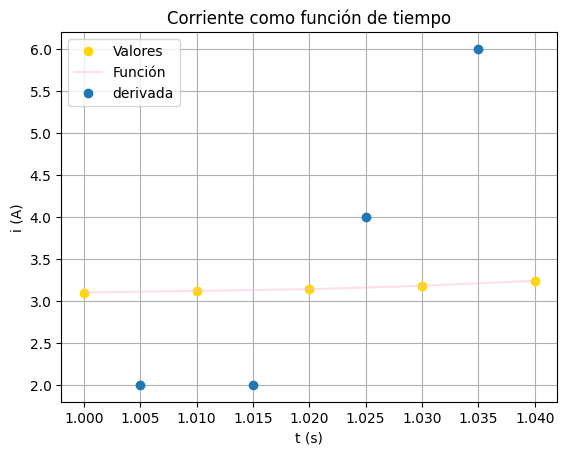

In [7]:
plt.figure()
plt.plot(t,i,"o",c="gold")
plt.plot(t,i,c="pink",alpha=0.5)
plt.plot(td,derivadae,"o")
plt.legend(["Valores","Función","derivada"])
plt.grid()
plt.title("Corriente como función de tiempo")
plt.xlabel("t (s)")
plt.ylabel("i (A)")
plt.show()

In [8]:
#td es tiempos promedio
id = promedio(i)
dicc={"t_m (s)":td,"dt":dt,"i_m (A)":id,"di":di,"di/dt":derivadae}
df2 = pd.DataFrame(dicc)
df2

,t_m (s),dt,i_m (A),di,di/dt
0,1.005,0.01,3.11,0.02,2.0
1,1.015,0.01,3.13,0.02,2.0
2,1.025,0.01,3.16,0.04,4.0
3,1.035,0.01,3.21,0.06,6.0


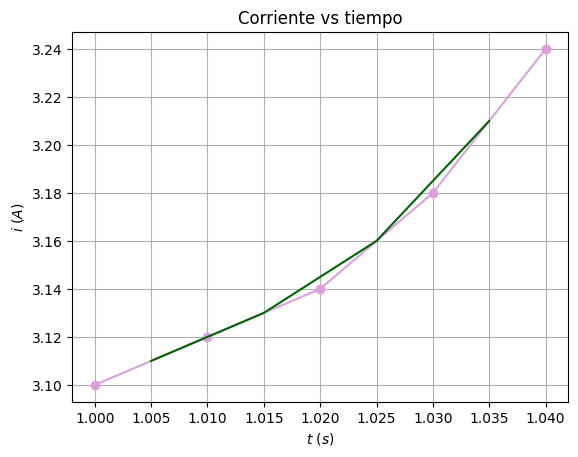

In [9]:
plt.plot(df["t"], df["i"], "-o", color = "plum")
plt.plot(df2["t_m (s)"], df2["i_m (A)"], "-", color = "darkgreen")
plt.title("Corriente vs tiempo")
plt.ylabel("$i~(A)$")
plt.xlabel("$t~(s)$")
plt.grid()
plt.show()

In [10]:
Fem = L*derivadae+R*id
Fem

array([2.40162, 2.40446, 4.36872, 6.33582])

## Ahora queremos integrar

In [11]:
i2 = np.array([3.10, 3.12, 3.14, 3.18, 3.24])
#t2 =

In [12]:
eps= 0.001
x = np.linspace(eps,np.pi/2,100,endpoint=False)
y= 1 / np.sqrt(np.tan(x))
scipy.integrate.trapezoid(y,x)

2.2751056564131336

In [13]:
#encontrar el valor donde trapecio es constante
def trapecio(eps,n):
  x = np.linspace(eps,np.pi/2,n,endpoint=False)
  y= 1 / np.sqrt(np.tan(x))
  return scipy.integrate.trapezoid(y,x)


In [24]:
n=1000
Epsilon=abs(np.linspace(-0.01,0,n, endpoint=False))
Epsilon = Epsilon[::-1]

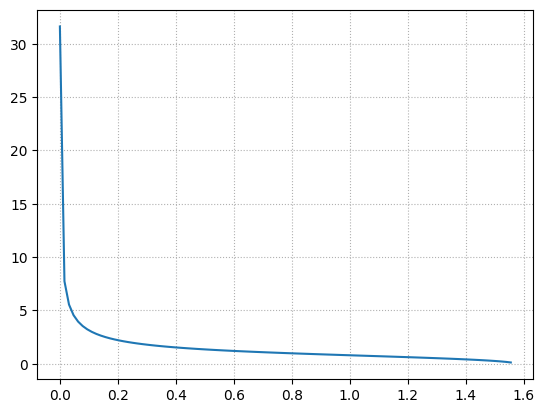

In [22]:
plt.figure()
plt.plot(x,y)
plt.grid(linestyle=':')
plt.show()

<Figure size 640x480 with 0 Axes>

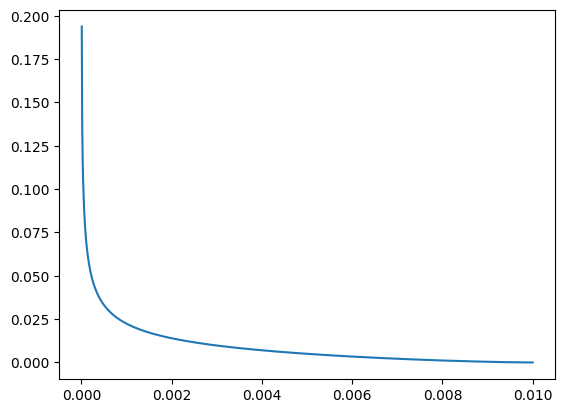

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure()
plt.plot(Epsilon,trapecio(Epsilon,n))
plt.figure()


In [17]:
xp = np.linspace(0,2,10)
yp = xp**2

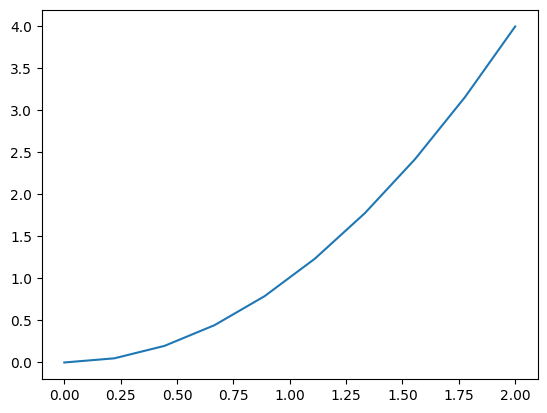

In [18]:
plt.figure()
plt.plot(xp,yp)
plt.show()

In [19]:
scipy.integrate.trapezoid(yp,xp)

2.683127572016461